# <font color="darkblue"> Prática 02: Classificação Linear - Regressão Linear </font>

**Objetivos:**


*   Implementar o modelo *perceptron* com o auxílio da Regressão Linear
*   Computar a medição de erro $E_{in}$
*   Corrigir o erro do LRClassifier usando o PLA
*   Computar as métricas de aprendizado

**Requisitos de execução:**


*   Upload dos arquivos *pocketpla.py* e *linearregression.py* 

**Atividade 1:**

1. Construa uma reta (função alvo : $f(x)$) a partir de dois pontos aleatórios: $p_1(x_1,x_2)$ e $p2(x_1, x_2)$

  Coeficiente angular: $m=\frac{p_2[x_2]-p_1[x_2]}{p_2[x_1]-p_1[x_1]}$
  
  Função: $f(x_1)= m \times (x_1 - p_1[x_1]) + p_1[x_2]$

2. Gere $N$ pontos aleatórios $p_i(x_1, x_2)$ e atribua rótulos de classificação da seguinte maneira:

    \begin{equation}
      y_i =  
      \begin{cases}
        +1  \quad \text{se } p_i[x_2] > f(p_i[x_1]) \\
        -1  \quad \text{se } p_i[x_2] < f(p_i[x_1]).
      \end{cases}
    \end{equation}

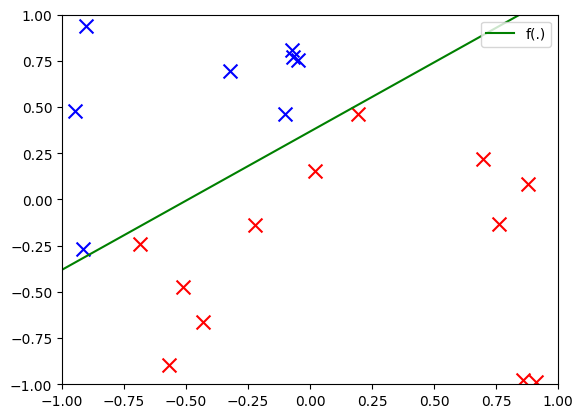

In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt

class RandomInput:
    def create_f(self):
        #gera os pontos p1 e p2 que formam a funcao f
        self.p1 = (random.uniform(-1,1), random.uniform(-1,1)) 
        self.p2 = (random.uniform(-1,1), random.uniform(-1,1))
        #computa o m da forma canonica de f
        self.m = (self.p2[1] - self.p1[1])/(self.p2[0] - self.p1[0])
    
    def f_canonica(self, x):
        return self.m*(x-self.p1[0]) + self.p1[1]

    def get_linear_input(self, N):
        self.create_f()
        #gera n numeros aleatorios, que não passam em f
        X = []
        y = []
        i = 0
        while i < N:
            x = [random.uniform(-1,1), random.uniform(-1,1)] 
            
            if(np.abs(x[1] - self.f_canonica(x[0])) < 0.0001) : # testa se o ponto está em cima da linha
                continue
                
            if(x[1] > self.f_canonica(x[0])) :
                y.append(+1)
            else :
                y.append(-1)
               
            X.append(x)
            i += 1          
            
        return X, y

def draw(X, y):
    #plota os pontos aleatórios de entrada da regressao linear
    xP = [X[i][0] for i in range(N) if(y[i] > 0)]
    yP = [X[i][1] for i in range(N) if(y[i] > 0)]
    xN = [X[i][0] for i in range(N) if(y[i] < 0)]
    yN = [X[i][1] for i in range(N) if(y[i] < 0)]

    plt.scatter(xP, yP, color='blue', marker='x', s=100)
    plt.scatter(xN, yN, color='red', marker='x', s=100)

    #desenha a função (reta) original que classificou os pontos
    xx = [-1, +1]
    yy = [rIN.f_canonica(xx[0]), rIN.f_canonica(xx[1])]
    plt.plot(xx, yy, 'g-', label='f(.)')
    plt.legend(loc='upper right')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    
N = 20
rIN = RandomInput()

X, y = rIN.get_linear_input(N)
    
draw(X, y)

**Atividade 2:**

Implemente o modelo *perceptron* com o auxílio da Regressão Linear.

In [14]:
from linearregressionp2 import LinearRegression

class LRClassifier():
    def execute(self, _X, _y):
      lr = LinearRegression()
      lr.fit(_X, _y)
      self.w = lr.getW()
        
    def predict(self, X):
       return [np.sign(np.dot(self.w, xn)) for xn in X]

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Gere *N* pontos aleatórios e utilize o algoritmo de *LRClassifier* para computar a função hipótese $g(x)=w^Tx$ e plote a mesma no gráfico de dispersão junto com os pontos gerados;
2. Plote os pontos classificados pela *LRClassifier* com bolinha azul(+1) e vermelha(-1) 
3. Calcule o erro $E_{in}$

                            Medidas de Error

    O que significa "$h \approx f$"??


\begin{equation}
E_{in} = \frac{1}{N}\sum_{n=1}^{N}e(h(x_n), f(x_n))
\end{equation}

                              Tipos de medida de erro
*   Erro quadrático (Regressão linear)
\begin{equation}
e(h(x),f(x)) = (h(x) - f(x))^2
\end{equation}
*   Erro binário (Classificação linear)
\begin{equation}
e(h(x),f(x)) = [\![ h(x) \neq f(x) ]\!] 
\end{equation}

3
Ein: 5.333333333333334


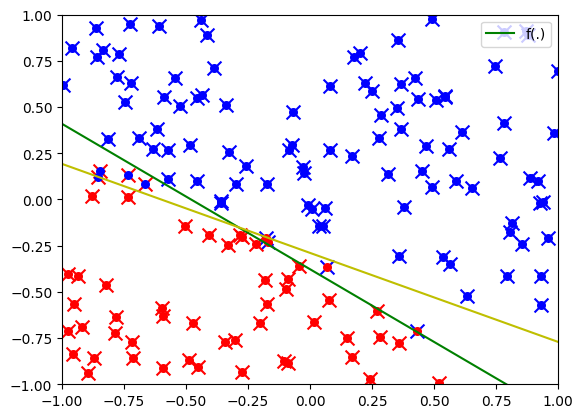

In [15]:
N = 150
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
draw(_X, _y)

#executando o classificador
rX = [[1,x[0], x[1]] for x in  _X]
classifier =  LRClassifier()
classifier.execute(rX, _y)
print(len(classifier.w))


#desenha a reta inferida pela regressao linear
xOri = [-1, +1]
yOri = [classifier.getRegressionY(xOri[0]), classifier.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')


#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rX)

xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)

#Computando o erro dentro da amostra (Ein)
eIN = 0

for i in range(N):
  if(pred[i] != _y[i]):
    eIN += 1
eIN = eIN / N

print("Ein: " + str(eIN*100))

**Atividade 4:**

1. Computar a matriz de confusão dos dados;
2. Usar a função *confusion_matrix* para computar a matriz de confusão;

    ***from sklearn.metrics import confusion_matrix***
3. Computar as métricas de apendizado: acurácia, precisão, recall e f1 score;
4. Usar a função *classification_report* para computar o relatório.

    ***from sklearn.metrics import classification_report***


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

#Calculando matriz de confusão
VP = 0
VN = 0
FP = 0
FN = 0

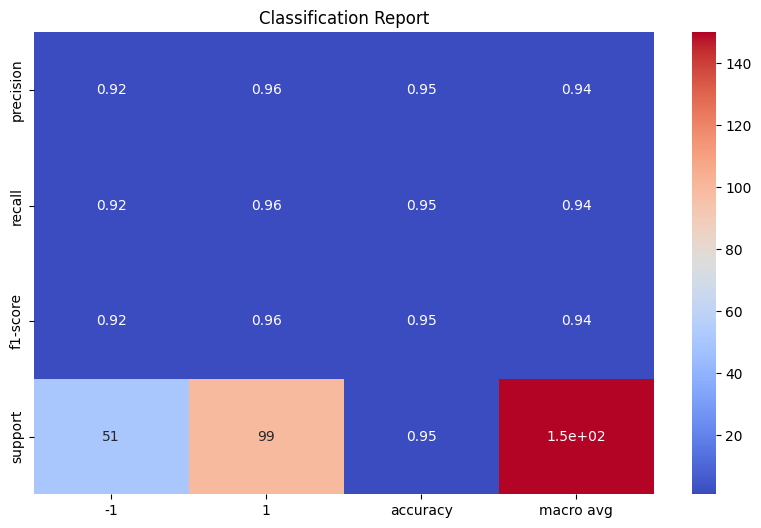

In [17]:
report = classification_report(_y, pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()


Atividade 5:

1. Plote 2 retas paralelas à função $g(x)=w^Tx$, inferida pela Regressão Linear, deslocadas do eixto $x_2$ de $g(x)$ em +1 e -1; 
2. Diminua o $E_{in}$ do *LRClassifier* com o auxilio do PLA.

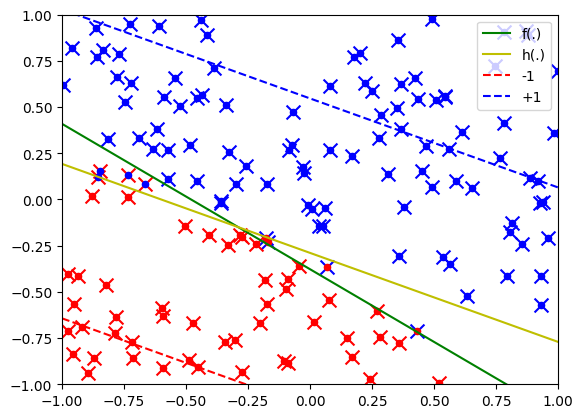

In [18]:
draw(_X, _y)

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Plote a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='h(.)')

#Plote a reta da regressão +1 e -1
yRLN = [classifier.getRegressionY(xRL[0], -1), classifier.getRegressionY(xRL[1], -1)]
plt.plot(xRL, yRLN, 'r--', label='-1')
yRLP = [classifier.getRegressionY(xRL[0], +1), classifier.getRegressionY(xRL[1], +1)]
plt.plot(xRL, yRLP, 'b--', label='+1')

plt.legend(loc='upper right')